## 4/16 範例程式

### 讀取資料

In [49]:
import pandas as pd 
df = pd.read_csv("data/10802_2020_party.csv") #匯資料
df["Post_Date"] = df["Date"].str.split(" ").str.get(0).str.title() #加Post_Date欄位
df['Post_Date'] = pd.to_datetime(df['Post_Date'])

df_blue_New = df[df['Page_Name']=='中國國民黨 KMT'][['Message','Post_Date']] #只要國民黨的文章和時間
df_blue_New = df_blue_New.dropna()

### 結巴斷詞 jieba
+ len(df_blue_New)：看國民黨的貼文總共有幾筆，單獨把doc_names印出來發現有482篇
+ 原本df_blue_New['Message']型態是pandas.core.series.Series，需要先轉成list的形式才可以加進去。
+ 接下來我們創造一個新的dataframe叫做df_blue_docs，型態是pandas.core.frame.DataFrame
+ 原本df_blue_docs裡面的'jieba_results'欄位型態是pandas.core.series.Series，需要轉成'str'(字串)型態才能做後續處理。

In [50]:
doc_names = range(len(df_blue_New)) #有幾篇文章
text_list = list(df_blue_New['Message']) #把要斷的東西轉list

#創造空的dataframe叫做df_blue_docs
df_blue_docs = pd.DataFrame(columns=['jieba_results'])

df_blue_docs['jieba_results'] = df_blue_docs['jieba_results'].astype('str')

把要存斷詞結果的dataframe準備好之後，就可以開始斷詞了。</br>

+ 第一個迴圈</br>
剛才我們知道，國民黨的篇數有482篇：
我們可以用一個for迴圈來跑每一篇文章，i是對應文章的意思，會從1(第一篇)跑到482(第482篇)；</br>
而text_list就是我們剛剛轉成list型態的國民黨貼文內容；text_list[1]，就是取出list第一個元素(第一篇貼文)的意思。</br>

+ 第二個迴圈</br>
words存的是文章斷詞後的集合物件(object)，我們需要跑第二個for迴圈把集合裡面的字取出來，</br>
word代表斷詞集合中的一個字，先把字轉換成str(字串)型態之後，字和字之間加上空格存在一起。

+ append加回斷詞欄位</br>
之後把text內容存到'jieba_results'這個欄位裡面，再和df_blue_docs合併。</br>
最後我們df_blue_docs，只會一個欄位jieba_results，存斷詞之後的結果。

In [51]:
import jieba
from tqdm import tqdm

for i in doc_names: #從第一篇到最後一篇
    words = jieba.cut(text_list[i], cut_all = False)
    
    text = ''
    for word in words:
        text = text + ' ' + str(word)    
    #print(words)
    #print(i) #第幾篇文章
    #print(text) #第幾篇文章的斷詞結果
    
    s = pd.Series({'jieba_results': text})
    df_blue_docs = df_blue_docs.append(s, ignore_index=True)#每次的斷詞結果都加回df_blue_docs

+ 注意
在最後生成的df_blue_docs，因為是ignore_index=True有重置過index</br>
所以在和df_blue_New合併之前，需要先重置df_blue_New的index</br>
> 可以參考：https://ithelp.ithome.com.tw/m/articles/10200052

In [52]:
df_blue_New.reset_index(inplace=True)

我們把最後得到的df_blue_docs，加到df_blue_New裡面

In [53]:
df_blue_New['jieba_results'] = df_blue_docs
df_blue_New_select = df_blue_New[['jieba_results','Post_Date']]
df_blue_New.head(2)

#可以查看個別貼文的斷詞情況
#df_blue_New['jieba_results'][477]

,index,Message,Post_Date,jieba_results
0,31,今日挺韓「南方崛起高雄光榮周年慶大遊行」 下午1點11分準時出發\n全程我們都是秉持著理性且...,2019-12-21,今日 挺韓 「 南方 崛起 高雄 光榮 周年 慶大遊行 」 下午 1 點 11 分準 ...
1,100,【元旦升旗，不見不散】\n\n你有多久沒有唱國歌、升國旗了？迎接明年元旦，我們一起升旗吧！國...,2019-12-29,【 元旦 升旗 ， 不見 不散 】 \n \n 你 有 多久 沒有 唱國歌 、 升國旗 了...


### 分析 民主進步黨 與 台灣民眾黨  

> #### 1. 資料前處理 
> #### 2. TF-IDF
> #### 3. PCA    
> #### 4. 關聯圖

### 資料前處理
選出民進黨的發文，處理方式和上面一樣

In [ ]:
df_green = df[df['Page_Name']=='民主進步黨']
df_green_New = df_green[['Post_Date', 'Message']]
df_green_New = df_green_New.dropna()
df_green_New['Message']

doc_names = range(len(df_green_New))
text_list = list(df_green_New['Message'])
df_green_docs = pd.DataFrame(columns=['jieba_results'])
df_green_docs['jieba_results'] = df_green_docs['jieba_results'].astype('str')

#停用字和自訂字典
jieba.load_userdict("dict/user.txt")
stopwords = [line.strip() for line in open('dict/stop_words.txt', 'r', encoding='utf-8').readlines()]  

for i in doc_names:
    
    words = jieba.cut(text_list[i], cut_all = False)
    text = ''
    for word in words:
        if word not in stopwords: 
            text = text + ' ' + str(word)
    s = pd.Series({'jieba_results': text})
    df_green_docs = df_green_docs.append(s, ignore_index=True)  
    
df_green_New.reset_index(inplace=True)  #不設定的話會有錯亂的情形，data對不起來
df_green_New['jieba_results'] = df_green_docs
df_green_New['df_class'] = 'green'

df_green_New

#改變日期
df_green_New['Post_Date'] = df_green_New['Post_Date'].apply(lambda x : str(x).split("/")[0].split("-")[0]+str(x).split("/")[0].split("-")[1])
test1 = df_green_New.groupby(df_green_New['Post_Date']).apply(lambda x:[' '.join(x['jieba_results'])]).rename(columns={'Post_Date':'jieba_results'})

#取出日期
date = sorted(df_green_New['Post_Date'].unique())
#取出各月份的文章，存到一個陣列中
store = []
for index, article in enumerate(test1):
    store.append(article[0])
#把資料格式轉成dict再塞進去panda的dataframe
d_green = {"Post_Date": date,"jieba_results": store,"df_class":'green'}
df_green_New = pd.DataFrame(d_green)
df_green_New

選出台灣民眾黨的發文，處理方式和上面一樣

In [69]:
df_white = df[df['Page_Name']=='台灣基進']

df_white_New = df_white[['Post_Date', 'Message']]
df_white_New = df_white_New.dropna()
df_white_New['Message']

doc_names = range(len(df_white_New))
text_list = list(df_white_New['Message'])
df_white_docs = pd.DataFrame(columns=['jieba_results'])
df_white_docs['jieba_results'] = df_white_docs['jieba_results'].astype('str')

#停用字和自訂字典
jieba.load_userdict("dict/user.txt")
stopwords = [line.strip() for line in open('dict/stop_words.txt', 'r', encoding='utf-8').readlines()]  

for i in doc_names:
    words = jieba.cut(text_list[i], cut_all = False)
    text = ''
    for word in words:
        text = text + ' ' + str(word)
    s = pd.Series({'jieba_results': text})
    if(text=='NAN'):
        print(text_list[i])
    elif(text==''):
        print(text_list[i])
    df_white_docs = df_white_docs.append(s, ignore_index=True)  
    
df_white_New.reset_index(inplace=True)        
df_white_New['jieba_results'] = df_white_docs
df_white_New['df_class'] = 'white'

df_white_New.head()

,index,Post_Date,Message,jieba_results,df_class
0,0,2020-01-11,選舉過後，台灣基進不會停歇。\n \n縱使韓國瑜沒有當選，他仍然在高雄破壞著我們的城市，仍會...,選舉過 後 ， 台灣 基進 不會 停歇 。 \n \n 縱使 韓國瑜 沒有 當選 ， ...,white
1,1,2020-01-10,謝謝吳念真支持陳柏惟❤️！,謝謝 吳念真 支持 陳柏惟 ❤ ️ ！,white
2,2,2020-01-12,【 3Q 陳柏惟-勝選感言】\n\n謝謝你們，你們做到了。\n\n半年前，我來到這邊的時候，...,【 3Q 陳柏惟 - 勝選 感言 】 \n \n 謝謝 你 們 ， 你們 做到 了...,white
3,4,2020-01-08,從台灣基進創立以來，高雄一直是我們最溫暖的家鄉。\n \n一路走來，我們從一個小木箱一隻麥克...,從 台灣 基進 創立 以來 ， 高雄 一直 是 我們 最溫 暖 的 家 鄉 。 \n ...,white
4,6,2020-01-12,首先，感謝每一張堅定投給台灣基進的政黨票。\n\n感謝每一位支持柏惟的選民。\n\n感謝因為...,首先 ， 感謝 每 一張 堅定 投給 台灣 基進 的 政黨票 。 \n \n 感謝 每 一...,white


#改變日期
df_white_New['Post_Date'] = df_white_New['Post_Date'].apply(lambda x : str(x).split("/")[0].split("-")[0]+str(x).split("/")[0].split("-")[1])
test2 = df_white_New.groupby(df_white_New['Post_Date']).apply(lambda x:[' '.join(x['jieba_results'])]).rename(columns={'Post_Date':'jieba_results'})

#取出日期
date = sorted(df_white_New['Post_Date'].unique())
#取出各月份的文章，存到一個陣列中
store = []
for index, article in enumerate(test2):
    store.append(article[0])
#把資料格式轉成dict再塞進去panda的dataframe
d_white = {"Post_Date": date,"jieba_results": store,"df_class":'white'}
df_white_New = pd.DataFrame(d_white)
df_white_New

合併上面兩個dataframe

In [56]:
mergeData = df_white_New.append(df_green_New)
mergeData = mergeData.dropna() #刪除有NAN值的data
mergeData

,Post_Date,jieba_results,df_class
0,201905,（ 編按 ： 美中 貿易 戰開 打 後 ， 五毛 薪資 縮水 ， 已降 為 三毛 ） \n...,white
1,201906,「 香港 、 到底 發生 了 什麼 事情 .... 」 \n \n 今天 ， 香港...,white
2,201907,看到 香港 剛發生 的 影片 ， 難過 到 無法 繼續 看 下去 。 \n \n 他們...,white
3,201908,這場 戰役 ， 不會 是 只有 柏 惟一 個 人 的 選戰 ； \n 台灣 基進 所有 的...,white
4,201909,那些 年 ， 阻撓 台灣 求援 的 中國 \n 文 / # 麟 爸 \n \n...,white
5,201910,狂賀 ！ 🇳 🇱 荷蘭以 132 : 18 壓倒性 支持 「 # 挺台 法案 」 ...,white
6,201911,🔥 中共 間諜 叛逃 ， 承認 協助 韓國瑜 選舉 ， 並滲 透台灣 基層 🔥 \n ...,white
7,201912,🎉 狂賀 # 反滲 透法 三讀 通過 🎉 \n 這是 迎接 新年 的 最 美好 大...,white
8,202001,選舉過 後 ， 台灣 基進 不會 停歇 。 \n \n 縱使 韓國瑜 沒有 當選 ， ...,white
0,201901,新任 民主 進步 黨 秘書長 為羅文嘉 捍衛 台灣國 家主 權 堅守 民主 和平 立場 ...,green


## TF-IDF
我們把剛才斷好詞的貼文，轉成list形式，全部放到corpus變數裡面，方便做tf-idf處理。
+ CountVectorizer算字頻（搭配fit_transform）
+ TfidfTransformer計算TFIDF
>　可以參考文章：https://ithelp.ithome.com.tw/articles/10228481?sc=iThelpR

In [57]:
corpus = mergeData['jieba_results'].values.tolist()

In [58]:
# TF-IDF
# coding:utf-8  

#算字頻
from sklearn.feature_extraction.text import CountVectorizer  
vectorizer = CountVectorizer()  
X = vectorizer.fit_transform(corpus)  
word = vectorizer.get_feature_names()  

#計算TFIDF
from sklearn.feature_extraction.text import TfidfTransformer  
transformer = TfidfTransformer()  
tfidf = transformer.fit_transform(X)

把文章的日期當作是待會畫PCA的特徵，一個點就會代表同一天的文

In [59]:
len(corpus)
features = tfidf.toarray() #轉矩陣
labels = mergeData['Post_Date'].values #Post_Date
labels

array(['201905', '201906', '201907', '201908', '201909', '201910',
       '201911', '201912', '202001', '201901', '201902', '201903',
       '201904', '201905', '201906', '201907', '201908', '201909',
       '201910', '201911', '201912', '202001'], dtype=object)

### PCA

In [60]:
from pandas import DataFrame, read_csv
import numpy as np
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
transData = pca.fit_transform(features, labels)
type(transData)
mergeData['pca1'] = DataFrame(transData[:,0])
mergeData['pca2'] = DataFrame(transData[:,1])
#mergeData.head()
print(features)
print(transData)

[[0.02636705 0.         0.         ... 0.         0.         0.        ]
 [0.08382999 0.00715306 0.         ... 0.         0.         0.        ]
 [0.18314472 0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.01209958 0.         ... 0.         0.01678173 0.        ]
 [0.         0.         0.         ... 0.         0.00291152 0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]
[[ 0.28283473 -0.09228738]
 [ 0.51051967 -0.0301865 ]
 [ 0.51697716 -0.02365416]
 [ 0.50979997 -0.00279909]
 [ 0.54153833  0.0026366 ]
 [ 0.52273857  0.03410285]
 [ 0.50693696  0.05995863]
 [ 0.48658191  0.09581739]
 [ 0.40536051  0.09274201]
 [-0.40051107 -0.30619866]
 [-0.36609873 -0.30698302]
 [-0.3699493  -0.2741652 ]
 [-0.33062228 -0.32584805]
 [-0.27721185 -0.34052216]
 [-0.29177975 -0.25168604]
 [-0.17266615 -0.13319689]
 [-0.24578585 -0.08962733]
 [-0.26135008  0.05005479]
 [-0.36106147  0.41475469]
 [-0.40448355  0.53615852]
 [-0.39255335  0

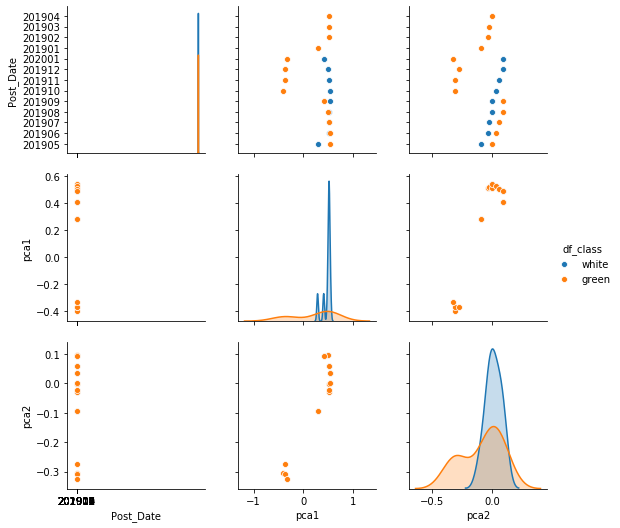

In [61]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.pairplot(kind = 'scatter',data=mergeData,hue="df_class", diag_kind="kde",height=2.5)

In [62]:
textFrame = pd.DataFrame(features, columns = word)
textFrame

,00,000,0000,0005,01,010,0103,0105,0110,0127,...,龍門,龐克,龐克音樂,龐大,龐大市場,龐大資產,龐大軍餉,龔青,龜山,龜笑
0,0.026367,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.083830,0.007153,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.003828,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.183145,0.000000,0.000000,0.000000,0.003969,0.000000,0.000000,0.00000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.005143,0.000000,0.000000,0.000000,0.000000
3,0.204195,0.000000,0.006612,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.004502,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.125331,0.012477,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.006678,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.107035,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,0.048289,0.002683,0.000000,0.000000,0.001436,0.000000,0.000000,0.00000,0.00000,0.000000,...,0.002109,0.000000,0.000000,0.004308,0.002109,0.001861,0.002109,0.002109,0.000000,0.000000
7,0.063876,0.001775,0.000000,0.000000,0.003799,0.001395,0.000000,0.00279,0.00279,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.001395
8,0.140572,0.000000,0.000000,0.003799,0.011638,0.000000,0.001899,0.00000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
9,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.092529,...,0.000000,0.000000,0.000000,0.007000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [63]:
allF = features.flatten()
nonZero = allF[np.nonzero(allF)]
m = np.median(nonZero)

In [64]:
allF[np.nonzero(allF)]

array([0.02636705, 0.04368663, 0.01478853, ..., 0.00409533, 0.00223551,
       0.01139995])

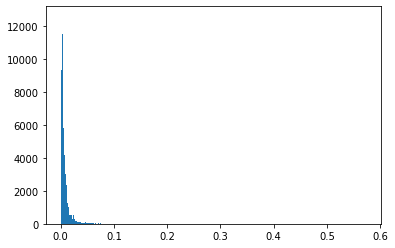

0.004490624616630315

In [65]:
plt.hist(nonZero, bins=500)
plt.show()
m

## k-means分群方法

In [66]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm

from sklearn.cluster import MiniBatchKMeans
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [67]:
tfidf = TfidfVectorizer( # TfidfVectorizer or CountVectorizer
    min_df = 5,
    max_df = 0.95,
    max_features = 8000,
    stop_words = 'english'
)
tfidf.fit(df_green_New['jieba_results'])
text = tfidf.transform(df_green_New['jieba_results'])

In [68]:
def find_optimal_clusters(data, max_k):
    iters = range(2, max_k+1, 2)
    
    sse = []
    for k in iters:
        sse.append(MiniBatchKMeans(n_clusters=k, init_size=1024, batch_size=2048, random_state=20).fit(data).inertia_)
        print('Fit {} clusters'.format(k))
        
    f, ax = plt.subplots(1, 1)
    ax.plot(iters, sse, marker='o')
    ax.set_xlabel('Cluster Centers')
    ax.set_xticks(iters)
    ax.set_xticklabels(iters)
    ax.set_ylabel('SSE')
    ax.set_title('SSE by Cluster Center Plot')
    
find_optimal_clusters(text, 20)

Fit 2 clusters
Fit 4 clusters
Fit 6 clusters
Fit 8 clusters
Fit 10 clusters
Fit 12 clusters


ValueError: n_samples=13 should be >= n_clusters=14

#### 設定kmeans要分幾群
因為是使用抽樣的方式，MiniBatchKMeans 和一般的kmeans相比速度較快
下面介紹他的參數有哪些，一般來說決定分幾群就可以，不太需要調參數：
+ n_clusters：要分幾群 
+ init_size：質心初始值候選的樣本個數，預設是batch_size的3倍，一般用預設值就可以了
+ batch_size：用來跑Mini Batch KMeans演算法的取樣集的大小，預設是100
  如果發現數據集的類別較多或者噪音點較多，需要增加這個值以達到較好的聚類效果

In [ ]:
clusters = MiniBatchKMeans(n_clusters=6, init_size=1024, batch_size=2048, random_state=20).fit_predict(text)

下面這邊會把用pca還有tsne兩種方式壓縮的散佈圖都畫出來，</br>
如果覺得分群的方式沒問題，就可以把每群的代表字抓出來。

In [ ]:
def plot_tsne_pca(data, labels):
    max_label = max(labels)
    max_items = np.random.choice(range(data.shape[0]), size=3000) #replace=False
    
    pca = PCA(n_components=2).fit_transform(data[max_items,:].todense())
    tsne = TSNE().fit_transform(PCA(n_components=50).fit_transform(data[max_items,:].todense()))
    
    
    idx = np.random.choice(range(pca.shape[0]), size=300) #replace=False
    label_subset = labels[max_items]
    label_subset = [cm.hsv(i/max_label) for i in label_subset[idx]]
    
    f, ax = plt.subplots(1, 2, figsize=(14, 6))
    
    ax[0].scatter(pca[idx, 0], pca[idx, 1], c=label_subset)
    ax[0].set_title('PCA Cluster Plot')
    
    ax[1].scatter(tsne[idx, 0], tsne[idx, 1], c=label_subset)
    ax[1].set_title('TSNE Cluster Plot')
    labels
    
plot_tsne_pca(text, clusters)

下面會把每一群tfidf較大的字印出來，在第八行的get_top_keywords可以決定要印幾個字，這裡先印20個。

In [ ]:
def get_top_keywords(data, clusters, labels, n_terms):
    df = pd.DataFrame(data.todense()).groupby(clusters).mean()
    
    for i,r in df.iterrows():
        print('\nCluster {}'.format(i))
        print(','.join([labels[t] for t in np.argsort(r)[-n_terms:]]))
            
get_top_keywords(text, clusters, tfidf.get_feature_names(), 20)